# Análise de Classificação com Random Forest

## Objetivo do Código

Neste notebook, vamos explorar a técnica de classificação utilizando o algoritmo **Random Forest**. O objetivo é desenvolver um modelo que preveja se um cliente irá ou não adquirir um cartão de crédito com base em um conjunto de características dos clientes. Utilizaremos um conjunto de dados que contém informações sobre os clientes, incluindo dados demográficos e financeiros.

## O que será Analisado

- **Carregamento e Pré-processamento dos Dados**: Iremos carregar os dados do arquivo `CreditCard.csv` e preparar o conjunto para análise, convertendo variáveis categóricas em variáveis numéricas e isolando as variáveis independentes (features) e dependentes (target).
  
- **Divisão do Conjunto de Dados**: O conjunto de dados será dividido em dados de treinamento e teste, para que possamos treinar nosso modelo e, em seguida, avaliar seu desempenho em dados que não foram utilizados durante o treinamento.

- **Criação e Treinamento do Modelo Random Forest**: Iremos criar um modelo de classificação utilizando a biblioteca `scikit-learn` e treinar esse modelo com os dados de treinamento.

- **Avaliação do Modelo**: Após o treinamento, avaliaremos o desempenho do modelo utilizando métricas como o relatório de classificação e o F1 Score.

- **Importância das Features**: Finalmente, analisaremos quais características dos dados tiveram mais impacto na decisão do modelo, visualizando a importância das variáveis.


## Instalar Dependências

Antes de executar o restante do notebook, precisamos instalar as bibliotecas necessárias. 
Utilizaremos o comando `!pip install` para instalar as seguintes dependências:
- pandas: para manipulação de dados.
- numpy: para operações numéricas.
- scikit-learn: para modelos de machine learning.
- matplotlib: para visualizações gráficas.

In [1]:
# !pip install pandas numpy scikit-learn matplotlib # descomente esta linha para instalar as dependências

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

## Carregar o Conjunto de Dados

A próxima etapa é carregar o conjunto de dados `CreditCard.csv`. Esse arquivo contém informações sobre clientes e suas características financeiras.

In [3]:
df = pd.read_csv('CreditCard.csv')
df.head()  # Exibir as primeiras linhas do conjunto de dados

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


## Transformar Dados em Numéricos

Os dados categóricos precisam ser convertidos em numéricos para que possam ser utilizados pelos algoritmos de machine learning. 
Vamos usar a técnica de one-hot encoding para essa transformação.

In [4]:
df = pd.get_dummies(data=df, drop_first=True)  # Transformar variáveis categóricas em variáveis dummy

# Isolar as variáveis dependentes e independentes
y = df.card_yes  # Variável dependente (target)
X = df.drop(columns=['card_yes'])  # Variáveis independentes (features)
X.head()  # Exibir as primeiras linhas das variáveis independentes

,reports,age,income,share,expenditure,dependents,months,majorcards,active,owner_yes,selfemp_yes
0,0,37.66667,4.5200,0.033270,124.983300,3,54,1,12,True,False
1,0,33.25000,2.4200,0.005217,9.854167,3,34,1,13,False,False
2,0,33.66667,4.5000,0.004156,15.000000,4,58,1,5,True,False
3,0,30.50000,2.5400,0.065214,137.869200,0,25,1,7,False,False
4,0,32.16667,9.7867,0.067051,546.503300,2,64,1,5,True,False


## Dividir o Conjunto de Dados

Agora, vamos dividir nosso conjunto de dados em conjuntos de treino e teste. 
O conjunto de treino será usado para treinar o modelo, enquanto o conjunto de teste servirá para avaliar sua performance.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)  # Manter a proporção das classes
len(X_train), len(X_test), len(y_train), len(y_test)  # Exibir tamanhos dos conjuntos

(1055, 264, 1055, 264)

## Criar o Modelo Random Forest

Agora que temos nossos dados preparados, vamos criar o modelo Random Forest. 
Um dos parâmetros importantes é o `n_estimators`, que representa o número de árvores a serem usadas no modelo.

In [6]:
model = RandomForestClassifier(n_estimators=50, random_state=42)  # Criar o modelo com 50 árvores
model.fit(X_train, y_train)  # Treinar o modelo com os dados de treino

RandomForestClassifier(n_estimators=50, random_state=42)

## Fazer Previsões e Avaliar o Modelo

Após o treinamento, vamos fazer previsões com o conjunto de teste e avaliar a performance do modelo usando a métrica F1 Score.

In [7]:
model_predict = model.predict(X_test)  # Fazer previsões no conjunto de teste

# Exibir o relatório de classificação
print(classification_report(y_test, model_predict))

# Calcular a F1 Score
f1_score_value = f1_score(y_test, model_predict)  # Calcular a F1 Score
f1_score_value  # Exibir o valor da F1 Score

              precision    recall  f1-score   support

       False       0.88      1.00      0.94        59
        True       1.00      0.96      0.98       205

    accuracy                           0.97       264
   macro avg       0.94      0.98      0.96       264
weighted avg       0.97      0.97      0.97       264



np.float64(0.9800995024875622)

## Plotar a Importância das Variáveis

Vamos plotar a importância das variáveis para entender quais características mais influenciam as previsões do modelo.

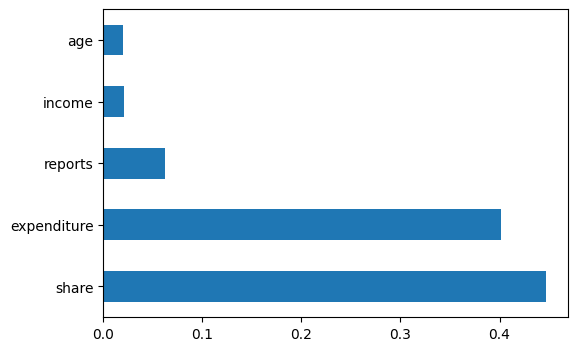

In [8]:
importance = pd.Series(model.feature_importances_, index=X_train.columns.values)  # Obter a importância das variáveis
importance.nlargest(5).plot(kind='barh', figsize=(6, 4));  # Plotar as 5 variáveis mais importantes

## Ajustar os Parâmetros do Modelo

Agora, vamos realizar a busca em grade (Grid Search) para encontrar o melhor número de árvores para o modelo, otimizando assim sua performance.

In [9]:
param_grid = {'n_estimators': range(50, 500, 50)}  # Definir a grade de parâmetros
grid = ParameterGrid(param_grid)  # Criar o grid de parâmetros

# Lista para armazenar os valores da F1 Score
f1score = []
for params in grid:
    model = RandomForestClassifier(n_estimators=params['n_estimators'], random_state=1502)  # Criar modelo com n_estimators do grid
    model.fit(X_train, y_train)  # Treinar o modelo

    predict = model.predict(X_test)  # Fazer previsões no conjunto de teste

    f1 = f1_score(y_test, predict)  # Calcular a F1 Score
    f1score.append(f1)  # Adicionar o valor à lista

best_n_estimators = grid[np.argmax(f1score)]  # Obtém os melhores parâmetros
print(best_n_estimators)  # Exibe os melhores parâmetros

{'n_estimators': 50}
